In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt # import library for visualization
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/data-science-salaries-2023/ds_salaries.csv


In [2]:
# create table contains salary data
df = pd.read_csv('/kaggle/input/data-science-salaries-2023/ds_salaries.csv')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


# **EDA**

**Deifinition for each column**
* work_year: The year the salary was paid.
* experience_level: The experience level in the job during the year
* employment_type: The type of employment for the role
* job_title: The role worked in during the year.
* salary: The total gross salary amount paid.
* salary_currency: The currency of the salary paid as an ISO 4217 currency code.
* salaryinusd: The salary in USD
* employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
* remote_ratio: The overall amount of work done remotely
* company_location: The country of the employer's main office or contracting branch
* company_size: The median number of people that worked for the company during the year

In [3]:
# showing first 5 rows of dataset 
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
# Examine number of row and column
df.shape

(3755, 11)

In [5]:
# checking data type and null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [6]:
# statistic summary for numeric value
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [7]:
# statistic summary for non-numeric value
df.describe(include = 'object')

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,3755,3755,3755,3755,3755,3755,3755
unique,4,4,93,20,78,72,3
top,SE,FT,Data Engineer,USD,US,US,M
freq,2516,3718,1040,3224,3004,3040,3153


In [8]:
# to see number of unique value for remote ratio column
df['remote_ratio'].value_counts()

0      1923
100    1643
50      189
Name: remote_ratio, dtype: int64

In [9]:
# to see number of unique value for experience level column
df['experience_level'].value_counts()

SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64

In [10]:
# to see number of unique value for employment type column
df['employment_type'].value_counts()

FT    3718
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64

In [11]:
# to see number of unique value for company size column
df['company_size'].value_counts()

M    3153
L     454
S     148
Name: company_size, dtype: int64

In [12]:
# create dictionary to map the data
remote_dict = {0 : 'On-site',
              50 : 'Hybrid',
              100 : 'Full-remote'
              }

In [13]:
# create dictionary to map the data
exp_dict = {'SE' : 'Senior-level',
           'MI' : 'Mid-level',
           'EN' : 'Entry-level',
           'EX' : 'Executive-level'
           }

In [14]:
# create dictionary to map the data
contract_dict = {'FT' : 'Full time',
                'PT' : 'Part time',
                'CT' : 'Contractor',
                'FL' : 'Freelancer'
                }

In [15]:
# create dictionary to map the data
company_dict = {'S' : 'Small',
                'M' : 'Medium',
                'L' : 'Large'
                }

In [16]:
# replace value for experience_level
df.experience_level = df.experience_level.map(exp_dict)

In [17]:
# replace value for employment_type
df.employment_type = df.employment_type.map(contract_dict)

In [18]:
# replace value for remote_ratio
df.remote_ratio = df.remote_ratio.map(remote_dict)

In [19]:
# replace value for company_size
df.company_size = df.company_size.map(company_dict)

In [20]:
# checking dataset after replace values
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior-level,Full time,Principal Data Scientist,80000,EUR,85847,ES,Full-remote,ES,Large
1,2023,Mid-level,Contractor,ML Engineer,30000,USD,30000,US,Full-remote,US,Small
2,2023,Mid-level,Contractor,ML Engineer,25500,USD,25500,US,Full-remote,US,Small
3,2023,Senior-level,Full time,Data Scientist,175000,USD,175000,CA,Full-remote,CA,Medium
4,2023,Senior-level,Full time,Data Scientist,120000,USD,120000,CA,Full-remote,CA,Medium


/tmp/ipykernel_20/1000928598.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('work_year').mean()['salary_in_usd'].plot(kind = 'bar')


Text(0.5, 1.0, 'Salary Trend')

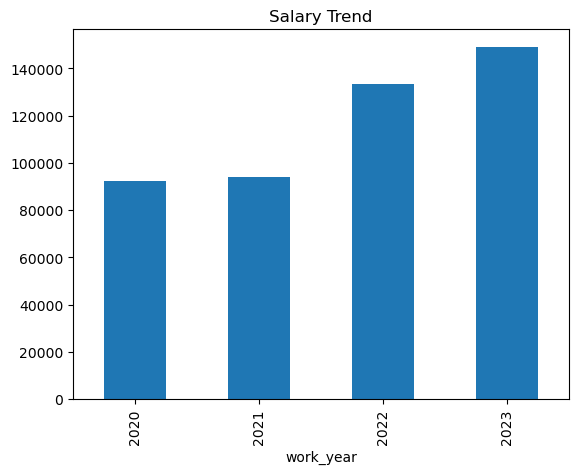

In [21]:
# a bar chart showing average salary over years
df.groupby('work_year').mean()['salary_in_usd'].plot(kind = 'bar')
plt.title('Salary Trend')


In [22]:
# after clean the data 
# export to excel in order to utilize with BI tools
df.to_excel('/kaggle/working/Salary.xlsx')